In [1]:
import matplotlib.pyplot as plt
import json
import sys
from pathlib import Path
import numpy as np
from scipy.ndimage import gaussian_filter
from scipy.signal import savgol_filter
from scipy.signal import find_peaks
import h5py
import os
sys.path.append(str(Path(os.getcwd()).parent.parent / 'viewer_napari/lib'))
import func

In [ ]:
path = Path('/run/media/friedrichjahns/Data/Registrierte_schnitte/PE-2021-00981-H_00_s0920_LAP_Inclination_Registered_Flat_v000.h5')
bounds = '11700 16701 97600 103000'
img = func.load_img(path,bounds)

with open(Path(os.getcwd())/ 'programme/analysis/plots/recources/straight_line_mask.json') as f:
    dat = json.load(f)
    mask_coords = np.array(dat['mask_coords']).T

plt.plot(mask_coords[1],mask_coords[0],'r',zorder=10,linewidth=2)
plt.imshow(img,cmap = 'gray')
plt.xlim(0,2500)
plt.ylim(4500,0)
plt.axis('off')
plt.savefig('results/masked_LAP_straight_line.pdf')
plt.show()

profile = func.straight_line_prof(img,mask_coords)
plt.bar(np.arange(len(profile)),profile,width = 1,label = 'Linienprofil',color='steelblue')
func.plot_config(param='inclination')

plt.savefig('results/line_prof_LAP_straigt.pdf')


bounds


FileNotFoundError: [Errno 2] Unable to synchronously open file (unable to open file: name = '/run/media/friedrichjahns/Data/Registrierte_schnitte/PE-2021-00981-H_00_s0920_LAP_Inclination_Registered_Flat_v000.h5', errno = 2, error message = 'No such file or directory', flags = 0, o_flags = 0)

In [ ]:
img_angled_line = func.example_angled_straight_line()

y_sum = np.sum(img,axis=0)
x_sum = np.sum(img,axis=1)

fig = plt.figure(figsize=(10,5))
plt.imshow(img_angled_line, cmap='binary',zorder=1)
plt.bar(np.arange(100),y_sum)
plt.barh(np.arange(100),x_sum)
plt.ylim(0,60)
plt.grid(True, linestyle='--', zorder=2)

plt.savefig('results/projection.pdf')

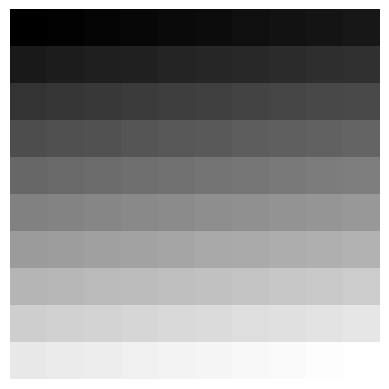

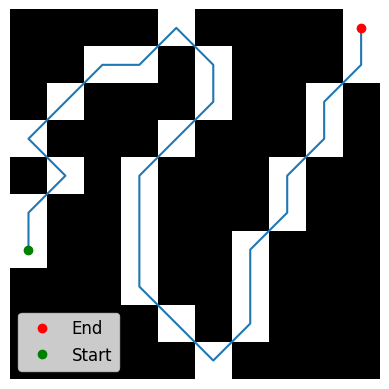

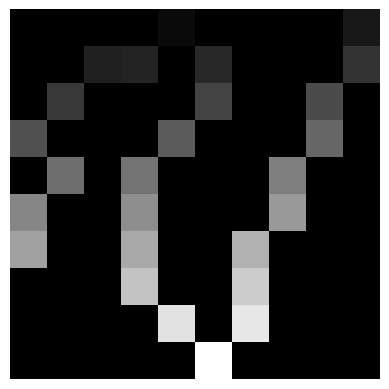

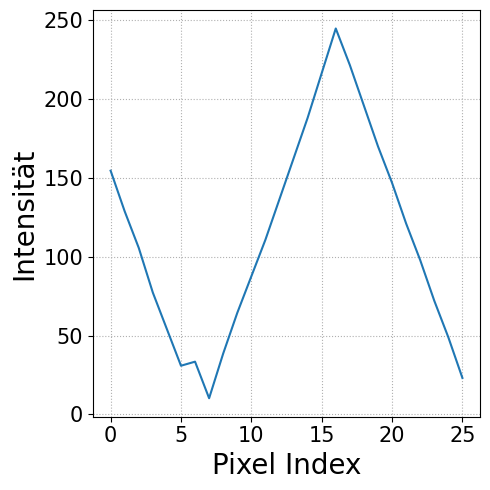

In [33]:
mask = np.array([[0, 0, 0, 0, 1, 0, 0, 0, 0, 1],
                [0, 0, 1, 1, 0, 1, 0, 0, 0, 1],
                [0, 1, 0, 0, 0, 1, 0, 0, 1, 0],
                [1, 0, 0, 0, 1, 0, 0, 0, 1, 0],
                [0, 1, 0, 1, 0, 0, 0, 1, 0, 0],
                [1, 0, 0, 1, 0, 0, 0, 1, 0, 0],
                [1, 0, 0, 1, 0, 0, 1, 0, 0, 0],
                [0, 0, 0, 1, 0, 0, 1, 0, 0, 0],
                [0, 0, 0, 0, 1, 0, 1, 0, 0, 0],
                [0, 0, 0, 0, 0, 1, 0, 0, 0, 0]])

img = np.linspace(0, 255, 100).reshape(10, 10)

sorted_maskp = func.sort_mask_points(mask)

values = []
for i in np.array(sorted_maskp[0]).T:
    values.append(img[int(i[0]),int(i[1])])

plt.imshow(img, cmap='gray')
plt.axis('off')
plt.savefig('results/line_follow_img.pdf')
plt.show()

plt.imshow(mask, cmap='gray')
plt.plot(sorted_maskp[0][1],sorted_maskp[0][0])
plt.plot(sorted_maskp[2][1],sorted_maskp[2][0],'ro',label='End')
plt.plot(sorted_maskp[1][1],sorted_maskp[1][0],'go',label='Start')
plt.legend(fontsize = 12)
plt.axis('off')
plt.savefig('results/line_follow_mask.pdf')
plt.show()

plt.imshow(img*mask, cmap='gray')
plt.axis('off')
plt.savefig('results/line_follow_img_maskedimg.pdf')
plt.show()

plt.figure(figsize=(5,5))
plt.plot(values)


plt.grid(True, linestyle='dotted', zorder=2)

plt.yticks(fontsize=15)
plt.xticks(fontsize=15)

plt.ylabel('Intensität',fontsize=20)
plt.xlabel('Pixel Index',fontsize=20)
plt.tight_layout()
plt.savefig('results/line_follow_histogram.pdf')


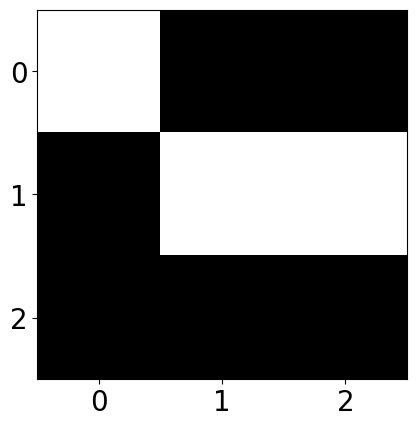

In [ ]:
img = np.array([[1,0,0],
                [0,1,1],
                [0,0,0],
                ])
plt.imshow(img, cmap='gray')
plt.xticks(np.arange(3),fontsize=20)
plt.yticks(np.arange(3),fontsize=20)
plt.savefig('results/line_follow.pdf')

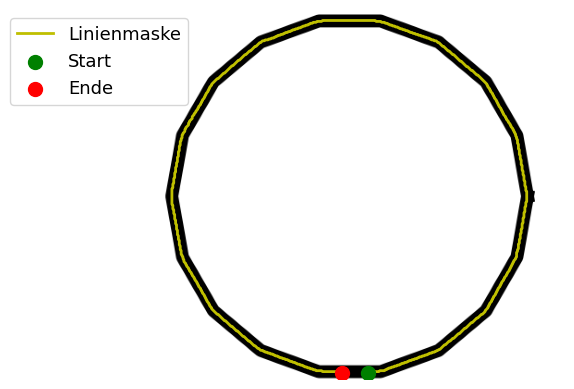

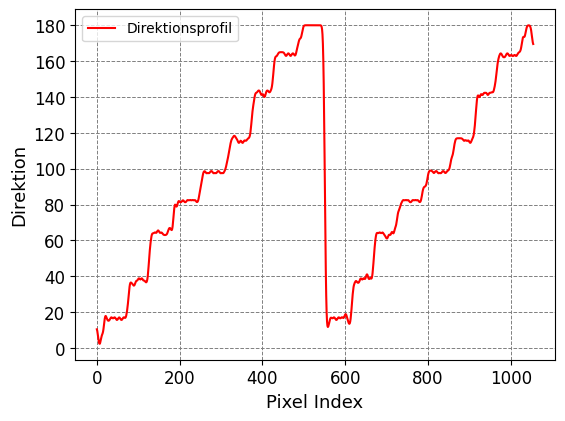

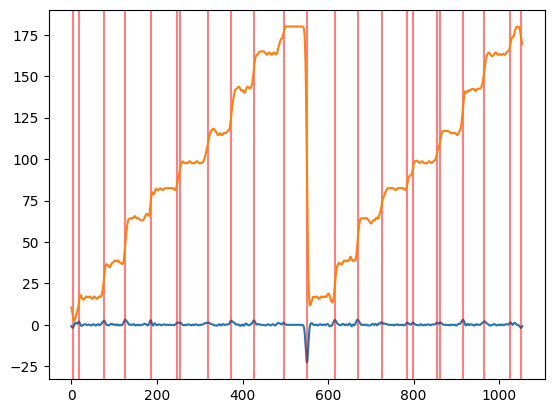

5


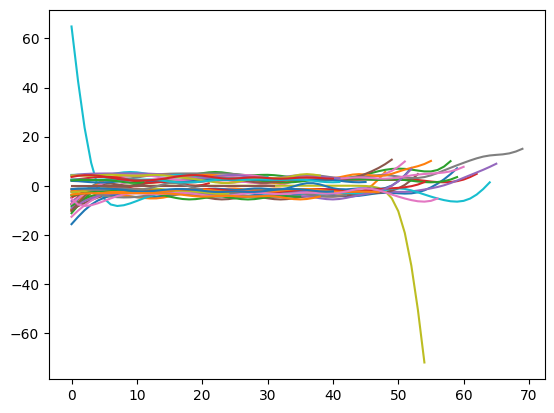

Overall Mean:0.0569+/-2.9036 Overall StanDev:0.7281+/-0.3660


In [111]:
with open(Path(os.getcwd()).parent.parent / 'viewer_napari/results/preused_masks/mask_15.json', 'r') as f:
    mask_points = json.load(f)
    mask = mask_points['mask_points']
    start = mask_points['start_point']
    end = mask_points['end_point']
with h5py.File(Path(os.getcwd()) / 'recources/dirtection_test.h5' , 'r') as f:
    img = f['Image'][:]

plt.imshow(img, cmap='gray')
plt.plot(mask[1],mask[0],'y',label='Linienmaske',linewidth =2)
plt.scatter(start[1],start[0],c='g',label='Start',zorder = 10,s=100)
plt.scatter(end[1],end[0],c='r',label='Ende',s=100,zorder=10)
plt.axis('off')
plt.legend(fontsize=13,loc='upper left', bbox_to_anchor=(-0.22, 1))
plt.ylim(500,100)
plt.xlim(40,540)
plt.show()


plt.plot(gaussian_filter(func.get_angles(mask),sigma=3),'r',label='Direktionsprofil')
func.plot_config(param='none')
plt.legend()
plt.yticks(np.arange(0,200,20))
plt.xlabel('Pixel Index',fontsize =13)
plt.ylabel('Direktion',fontsize =13)
plt.savefig('circ.pdf')
plt.show()

smoothed_plot = gaussian_filter(func.get_angles(mask),sigma=3)
diff = np.gradient(smoothed_plot)
plt.plot(diff)


peaks = find_peaks(np.abs(diff), height=1.2)
for i in peaks[0]:
    plt.axvline(x=np.arange(len(smoothed_plot))[i],color='r',alpha=0.5)

plt.plot(smoothed_plot)
plt.show()
peaks = peaks[0]
normalized_profile_snippets = []
for i in range(1,len(peaks)-1):
    p1 = int(peaks[i])
    p2 = int(peaks[i+1])
    if p2-p1<30:
         continue
    y = smoothed_plot[p1:p2]
    ynormalized = y-np.full(len(y),np.round(np.mean(y)/20)*20)
    normalized_profile_snippets.append(ynormalized)

for i in normalized_profile_snippets:
    plt.plot(i)

bounds1 = []
bounds2 = []
for i in range(len(normalized_profile_snippets)):
    for j in range(len(normalized_profile_snippets[i])):
        if normalized_profile_snippets[i][0] <= np.median(normalized_profile_snippets[i]):
            if normalized_profile_snippets[i][j] >= np.median(normalized_profile_snippets[i]):
                bounds1.append(j)
                break
        elif normalized_profile_snippets[i][0] >= np.median(normalized_profile_snippets[i]):
            if normalized_profile_snippets[i][j] <= np.median(normalized_profile_snippets[i]):
                bounds1.append(j)
                print(j)
                break

for i in range(len(normalized_profile_snippets)):
    for j in range(1,len(normalized_profile_snippets[i])):
        if normalized_profile_snippets[i][-1] >= np.median(normalized_profile_snippets[i]):
            if normalized_profile_snippets[i][-j] <= np.median(normalized_profile_snippets[i]):
                bounds2.append(-j)
                break
        elif normalized_profile_snippets[i][-1] <= np.median(normalized_profile_snippets[i]):
            if normalized_profile_snippets[i][-j] >= np.median(normalized_profile_snippets[i]):
                bounds2.append(-j)
                break
prof_ges = []
means = []
std = []
for i in range(len(normalized_profile_snippets)):
    const_parts  = normalized_profile_snippets[i][bounds1[i]:bounds2[i]]
    means.append(np.mean(const_parts))
    std.append(np.std(const_parts)) 
    plt.plot(const_parts,label = f'{i}')
    prof_ges = np.concatenate((prof_ges,normalized_profile_snippets[i][bounds1[i]:bounds2[i]]))

plt.show()
# print(f'mean:{np.mean(prof_ges)}std:{np.std(prof_ges)}')

print(f'Overall Mean:{np.mean(means):.4f}+/-{np.std(means):.4f} Overall StanDev:{np.mean(std):.4f}+/-{np.std(std):.4f}')

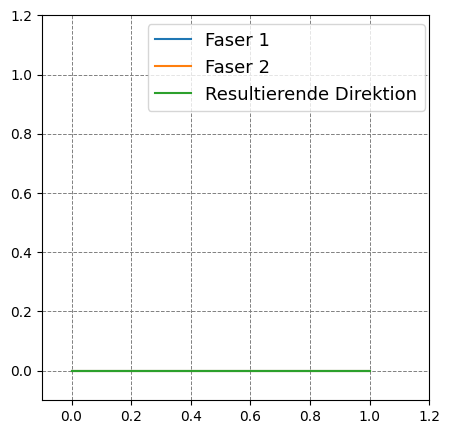

<Figure size 640x480 with 0 Axes>

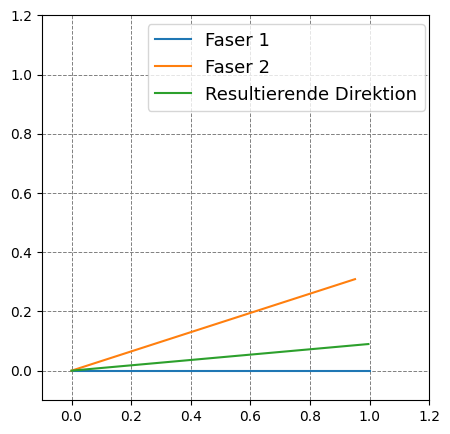

<Figure size 640x480 with 0 Axes>

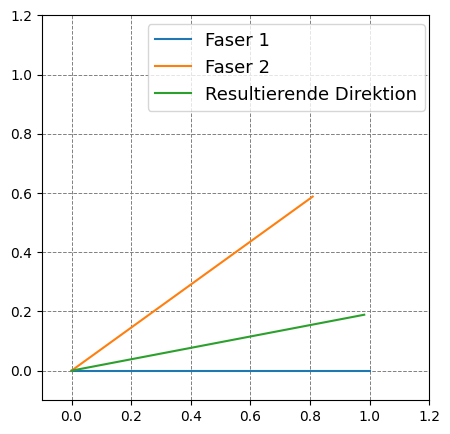

<Figure size 640x480 with 0 Axes>

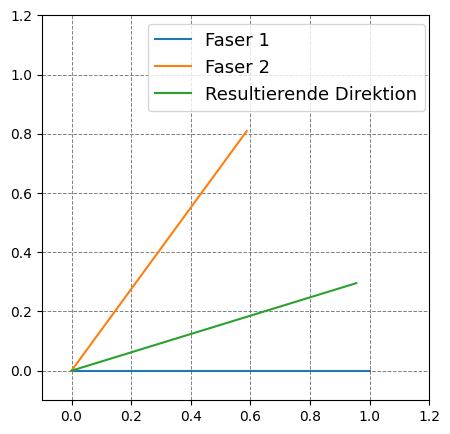

<Figure size 640x480 with 0 Axes>

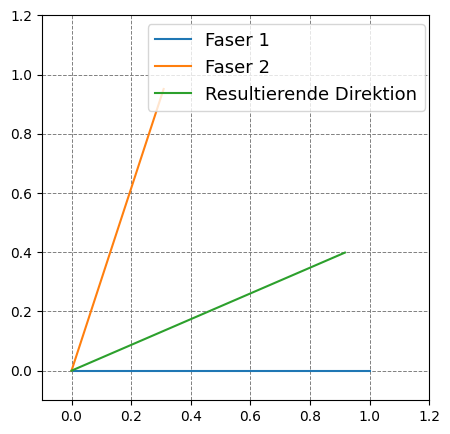

<Figure size 640x480 with 0 Axes>

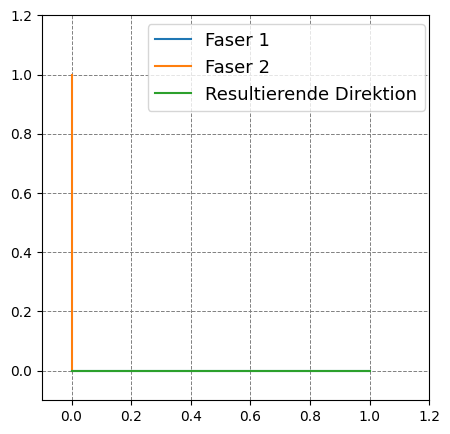

<Figure size 640x480 with 0 Axes>

In [68]:
def rotation(theta):
    return np.array([[np.cos(theta),-np.sin(theta)],[np.sin(theta),np.cos(theta)]])

def retarder(delta):
    return np.array([[np.exp(1j*(delta/2)),0],[0,np.exp(-1j*(delta/2))]])

def quater_wave_retarder(psi=-np.pi/2):
    return rotation(psi)@retarder(np.pi/2)@rotation(-(psi))

def fiber(theta,rho,delta):
    return rotation(theta-rho)@retarder(delta)@rotation(-(theta-rho))

def lin_pol(axis):
    if axis == 'x':
        return np.array([[1,0],[0,0]])
    elif axis == 'y':
        return np.array([[0,0],[0,1]])
    


def measurement(theta,rho,delta):
    return lin_pol('y')@fiber(theta,rho,delta)@quater_wave_retarder()@lin_pol('x')@jones_inital

def measurement_2_fibers(theta1,rho1,delta1,theta2,rho2,delta2):
    return lin_pol('y')@fiber(theta1,rho1,delta1)@fiber(theta2,rho2,delta2)@quater_wave_retarder()@lin_pol('x')@jones_inital

jones_inital = np.array([[1],[0]])
dir2=0
for dir1 in np.linspace(0,np.pi/2,6):
    x = np.arange(0,np.pi,0.01)
    y = []
    for i in x :
        y.append((measurement_2_fibers(i,dir1,np.pi/4,i,dir2,np.pi/4)[1]).real)

    indices = np.where(np.isclose(y, 0, atol=0.005))
    phase = x[indices[0][0]]

    plt.figure(figsize=(5,5))
    plt.plot([0,np.cos(dir2)],[0,np.sin(dir2)],label='Faser 1')
    plt.plot([0,np.cos(dir1)],[0,np.sin(dir1)],label='Faser 2')
    plt.plot([0,np.cos(phase)],[0,np.sin(phase)],label='Resultierende Direktion')
    plt.legend(fontsize=13,loc='upper left', bbox_to_anchor=(.25, 1))
    plt.grid(color='grey', linestyle='--', linewidth=0.7)
    plt.xlim(-0.1, 1.2)
    plt.ylim(-0.1, 1.2)
    plt.savefig(f'results/{dir1}.pdf')
    plt.show()
    plt.clf()


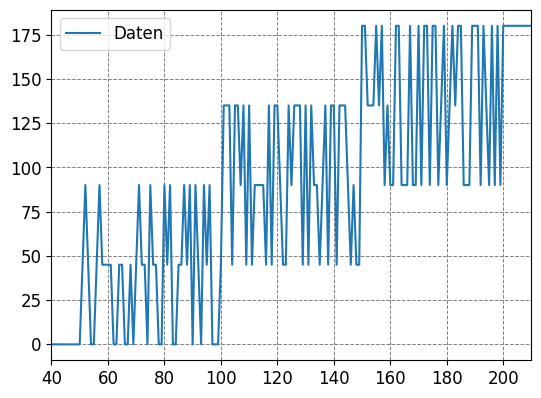

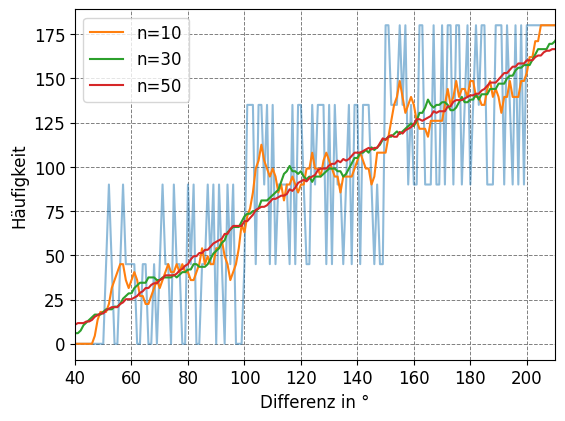

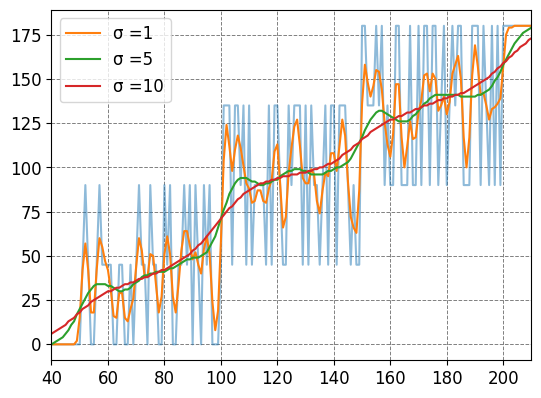

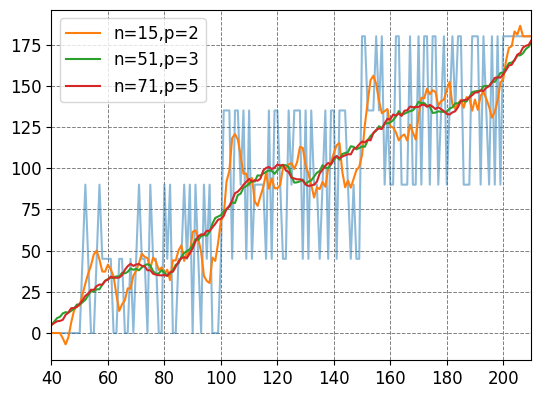

In [20]:
values1 = [0,45,90]
values2 = [45,90,135]
values3 = [90,135,180]

data = []
for i in range(50):
    data.append(0)
for i in range(50):
    data.append(np.random.choice(values1))
for i in range(50):
    data.append(np.random.choice(values2))
for i in range(50):
    data.append(np.random.choice(values3))
for i in range(50):
    data.append(180)

plt.plot(data,label='Daten')
plt.grid(True, linestyle='dotted', zorder=2)
func.plot_config(param='none')
plt.xlim(40,210)
plt.savefig('data_glättung.pdf')
plt.show()


plt.plot(data,alpha=0.5)
plt.plot(func.movingaverage(data,10),label='n=10')
# plt.plot(func.movingaverage(data,2,label='n=0'0))
plt.plot(func.movingaverage(data,30),label='n=30')
plt.plot(func.movingaverage(data,50),label='n=50')
plt.grid(True, linestyle='dotted', zorder=2)
func.plot_config()
plt.xlim(40,210)

plt.savefig('movingaverage.pdf')
plt.show()


plt.plot(data,alpha=0.5)
plt.plot(gaussian_filter(data,1),label='σ =1')
# plt.plot(gaussian_filter(data,,l abel='\sigma='3))
plt.plot(gaussian_filter(data,5),label='σ =5')
plt.plot(gaussian_filter(data,10),label='σ =10')
plt.grid(True, linestyle='dotted', zorder=2)
func.plot_config(param='none')
plt.xlim(40,210)
plt.savefig('gaussian_smoothing.pdf')
plt.show()


plt.plot(data,alpha=0.5)
# plt.plot(use_savgol_filter(data,3,1))
plt.plot(savgol_filter(data,15,2),label='n=15,p=2')
# plt.plot(savgol_filter(data,21,3),label='n=,p=')
plt.plot(savgol_filter(data,51,3),label='n=51,p=3')
plt.plot(savgol_filter(data,71,5),label='n=71,p=5')
plt.grid(True, linestyle='dotted', zorder=2)
func.plot_config(param='none')
plt.xlim(40,210)
plt.savefig('savgol_filter.pdf')
plt.show()